# IRIS Flowers Classification

In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [415]:
df = pd.read_csv('iris.data',header=None)

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [417]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot: >

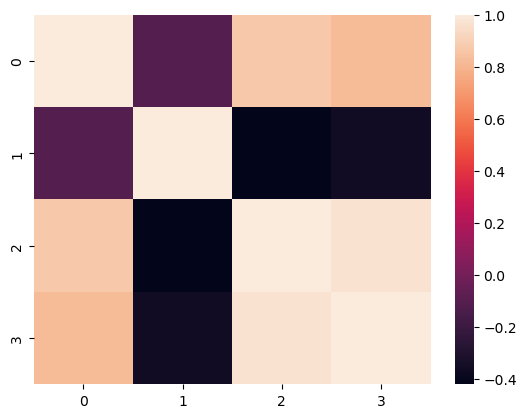

In [418]:
sns.heatmap(df.corr())

## Uniformly Distributed Dataset

<AxesSubplot: >

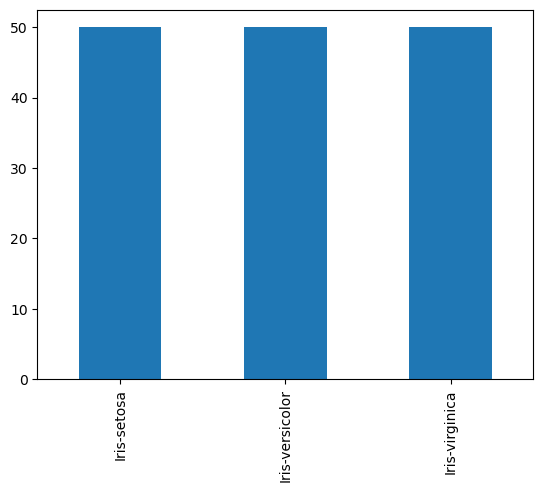

In [419]:
df[4].value_counts().plot(kind='bar')

In [420]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df[4])

In [421]:
from sklearn.model_selection import train_test_split

In [422]:
X_train, X_test, y_train, y_test = train_test_split(df.drop([4],axis=1), y_encoded, test_size=0.33, random_state=42)

In [423]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model

In [424]:
model = keras.Sequential()
model.add(  layers.Dense(16, activation="relu" ,input_shape=(4,))  )
model.add(  layers.Dense(10, activation="relu" )  )
model.add(  layers.Dense(3, activation="softmax", )  )

In [425]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                80        
                                                                 
 dense_17 (Dense)            (None, 10)                170       
                                                                 
 dense_18 (Dense)            (None, 3)                 33        
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


In [426]:
model.compile(optimizer="Adam",  loss='categorical_crossentropy', metrics=['accuracy'])

In [427]:
history = model.fit(X_train, pd.get_dummies(y_train), batch_size=16, epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 1.1395 - accuracy: 0.3400
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0499 - accuracy: 0.5300
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0013 - accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9658 - accuracy: 0.5000
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9255 - accuracy: 0.5700
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8937 - accuracy: 0.4900
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8679 - accuracy: 0.4400
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8402 - accuracy: 0.5800
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.7900
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7928 - accuracy: 0.8400
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9700
Epoch 85/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.9700
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9900
Epoch 87/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.9800
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.9800
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 0.9700
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9700
Epoch 91/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9500
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9600
Epoch 93/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9700
Epoch 94/100
7/7 [===============

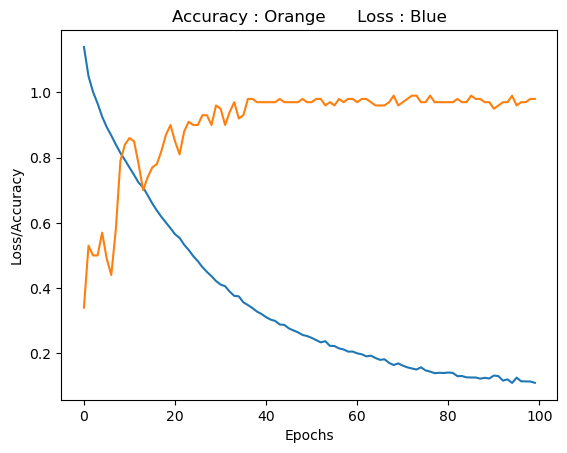

In [428]:
loss = history.history['loss']
accuracy = history.history['accuracy']

plt.plot(loss)
plt.plot(accuracy)

plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Accuracy : Orange      Loss : Blue')
plt.show()


In [429]:
prediction = model.predict(X_test)
predicted = [np.argmax(x) for x in prediction]


2/2 [==============================] - 0s 2ms/step


In [430]:
print(f" Test Accuracy {sum(np.array(predicted) == y_test) / len(predicted)*100} %")

 Test Accuracy 100.0 %


# Predict New Data 

In [431]:
def Askuser():

    def predict(arr):
        flower = dict()
        flower[0] = "Iris Setosa"
        flower[1] = "Iris Versicolour"
        flower[2] = "Iris Virginica"
        return flower[np.argmax(model.predict(np.array(arr).reshape(1,4),verbose=0))]
    
    
    sepal_length  = input("sepal length in cm   ")
    sepal_width  = input("sepal width in cm   ")
    petal_length  = input("petal length in cm   ")
    petal_width  = input("petal width in cm   ")
    print("Flower is  :",predict([float(sepal_length),float(sepal_width),float(petal_length),float(petal_width)]))

In [432]:
Askuser()

sepal length in cm   4.2
sepal width in cm   1.5
petal length in cm   3.2
petal width in cm   1.3
Flower is  : Iris Virginica
